# Lesson 1 - Using Convolutional Neural Networks

This notebook is created in order to complete the assignment of [fast.ai](http://www.fast.ai/)'s lesson 1. The dataset used in this assignment is from [Kaggle's Dogs vs Cats Redux competition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data).

## The Dataset

Let's explore the numbers,

In [1]:
print('Number of test examples:')
!ls ./data/test | wc -l
print('Number of train examples:')
!ls ./data/train | wc -l

Number of test examples:
12500
Number of train examples:
25000


The file names are structured like,

In [2]:
!ls ./data/train -U | head -5
!ls ./data/test -U | head -5

dog.2521.jpg
cat.5214.jpg
dog.1552.jpg
dog.10968.jpg
cat.8588.jpg
ls: write error: Broken pipe
10.jpg
11518.jpg
10070.jpg
3382.jpg
1936.jpg
ls: write error: Broken pipe


Let's restructure the train directory as it is in fast.ai lesson.

In [3]:
!mkdir -p ./data/train-fast-ai/dogs
!mkdir -p ./data/train-fast-ai/cats

!rm ./data/train-fast-ai/dogs/* ./data/train-fast-ai/cats/*

!cp -r ./data/train/dog.* ./data/train-fast-ai/dogs/
!cp -r ./data/train/cat.* ./data/train-fast-ai/cats/

Split 1000 examples of cats and dogs for validation

In [4]:
!mkdir -p ./data/valid-fast-ai/dogs
!mkdir -p ./data/valid-fast-ai/cats

!rm ./data/valid-fast-ai/dogs/* ./data/valid-fast-ai/cats/*

!shuf -n 1000 -e ./data/train-fast-ai/dogs/* | xargs -i mv {} ./data/valid-fast-ai/dogs
!shuf -n 1000 -e ./data/train-fast-ai/cats/* | xargs -i mv {} ./data/valid-fast-ai/cats

Copy some examples for a sample dataset, these will be used to check if code is running.

In [5]:
!mkdir -p ./data/sample-fast-ai/train/dogs
!mkdir -p ./data/sample-fast-ai/train/cats
!mkdir -p ./data/sample-fast-ai/valid/dogs
!mkdir -p ./data/sample-fast-ai/valid/cats

!rm -r ./data/sample-fast-ai/train/dogs/* ./data/sample-fast-ai/train/cats/*
!rm -r ./data/sample-fast-ai/valid/dogs/* ./data/sample-fast-ai/valid/cats/*

!shuf -n 100 -e ./data/train-fast-ai/dogs/* | xargs -i cp {} ./data/sample-fast-ai/train/dogs
!shuf -n 100 -e ./data/train-fast-ai/cats/* | xargs -i cp {} ./data/sample-fast-ai/train/cats
!shuf -n 100 -e ./data/train-fast-ai/dogs/* | xargs -i cp {} ./data/sample-fast-ai/valid/dogs
!shuf -n 100 -e ./data/train-fast-ai/cats/* | xargs -i cp {} ./data/sample-fast-ai/valid/cats

Print the numbers,

In [6]:
print('Number of dog examples in train set')
!ls ./data/train-fast-ai/dogs/ | wc -l
print('Number of cat examples in train set')
!ls ./data/train-fast-ai/cats/ | wc -l

Number of dog examples in train set
11500
Number of cat examples in train set
11500


In [7]:
print('Number of dog examples in validation set')
!ls ./data/valid-fast-ai/dogs/ | wc -l
print('Number of cat examples in validation set')
!ls ./data/valid-fast-ai/cats/ | wc -l

Number of dog examples in validation set
1000
Number of cat examples in validation set
1000


In [8]:
print('Number of dog examples in sample/train set')
!ls ./data/sample-fast-ai/train/dogs/ | wc -l
print('Number of cat examples in sample/train set')
!ls ./data/sample-fast-ai/train/cats/ | wc -l
print('Number of dog examples in sample/valid set')
!ls ./data/sample-fast-ai/valid/dogs/ | wc -l
print('Number of cat examples in sample/valid set')
!ls ./data/sample-fast-ai/valid/cats/ | wc -l

Number of dog examples in sample/train set
100
Number of cat examples in sample/train set
100
Number of dog examples in sample/valid set
100
Number of cat examples in sample/valid set
100


## Import pyhton dependencies

In [9]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob

## Visualize some examples

Train dataset


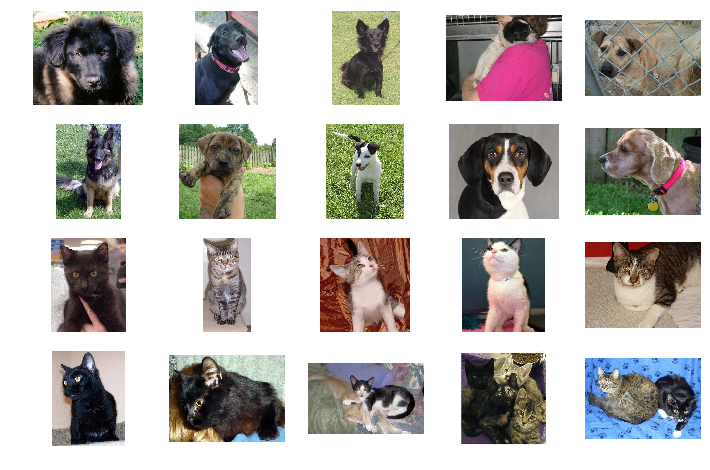

In [15]:
imgs_dogs = glob.glob('./data/train-fast-ai/dogs/*.jpg')
imgs_cats = glob.glob('./data/train-fast-ai/cats/*.jpg')

print('Train dataset')
plt.figure(figsize=(12,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    if i < 10:
        plt.imshow(mpimg.imread(imgs_dogs[i]))
    else:
        plt.imshow(mpimg.imread(imgs_cats[i]))
    plt.axis('off')
plt.show()
plt.close()

Valid dataset


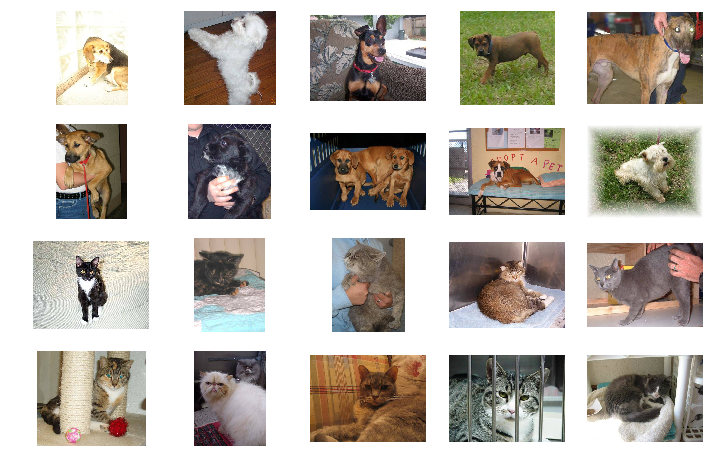

In [16]:
imgs_dogs = glob.glob('./data/valid-fast-ai/dogs/*.jpg')
imgs_cats = glob.glob('./data/valid-fast-ai/cats/*.jpg')

print('Valid dataset')
plt.figure(figsize=(12,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    if i < 10:
        plt.imshow(mpimg.imread(imgs_dogs[i]))
    else:
        plt.imshow(mpimg.imread(imgs_cats[i]))
    plt.axis('off')
plt.show()
plt.close()

Sample/train dataset


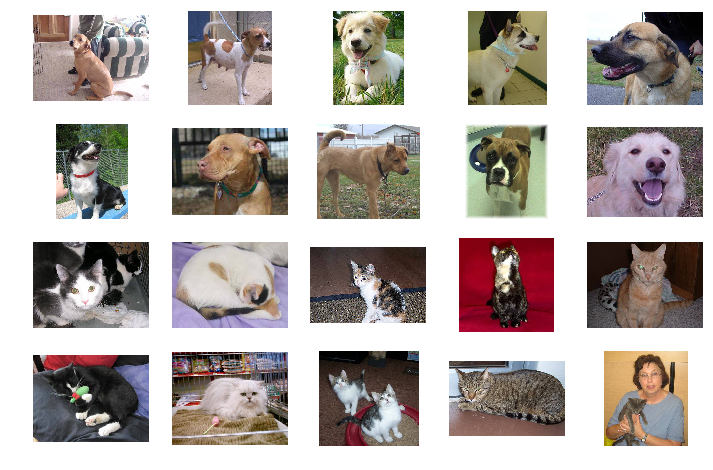

In [17]:
imgs_dogs = glob.glob('./data/sample-fast-ai/train/dogs/*.jpg')
imgs_cats = glob.glob('./data/sample-fast-ai/train/cats/*.jpg')

print('Sample/train dataset')
plt.figure(figsize=(12,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    if i < 10:
        plt.imshow(mpimg.imread(imgs_dogs[i]))
    else:
        plt.imshow(mpimg.imread(imgs_cats[i]))
    plt.axis('off')
plt.show()
plt.close()

Sample/valid dataset


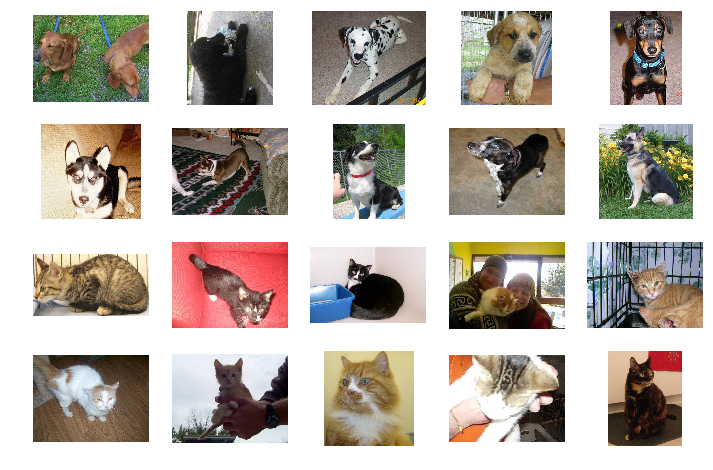

In [18]:
imgs_dogs = glob.glob('./data/sample-fast-ai/valid/dogs/*.jpg')
imgs_cats = glob.glob('./data/sample-fast-ai/valid/cats/*.jpg')

print('Sample/valid dataset')
plt.figure(figsize=(12,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    if i < 10:
        plt.imshow(mpimg.imread(imgs_dogs[i]))
    else:
        plt.imshow(mpimg.imread(imgs_cats[i]))
    plt.axis('off')
plt.show()
plt.close()